In [1]:
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal
import matplotlib.pyplot as plt
import numpy as np
import time

C:\Users\dell\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [5]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [7]:
print(X_train.shape)

(60000, 784)


In [8]:
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [9]:
X_train = X_train/255
X_test = X_test/255

In [10]:
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [14]:
print(y_train[5])
Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[5])

2
After converting the output into a vector :  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [18]:
from keras.models import Sequential 
from keras.layers import Dense, Activation 
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization

In [17]:

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

# 2 Hidden Layers with 364-52

In [40]:
model = Sequential()

model.add(Dense(364, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal()))
model.add(BatchNormalization())
model.add(Dropout(0.6))

model.add(Dense(52, activation='relu', kernel_initializer=RandomNormal()) )
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(output_dim, activation='softmax'))


model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 364)               285740    
_________________________________________________________________
batch_normalization_27 (Batc (None, 364)               1456      
_________________________________________________________________
dropout_27 (Dropout)         (None, 364)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 52)                18980     
_________________________________________________________________
batch_normalization_28 (Batc (None, 52)                208       
_________________________________________________________________
dropout_28 (Dropout)         (None, 52)                0         
_________________________________________________________________
dense_37 (Dense)             (None, 10)                530       
Total para

In [41]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 13s 219us/step - loss: 0.4251 - acc: 0.8738 - val_loss: 0.1555 - val_acc: 0.9524
Epoch 2/20
60000/60000 [==============================] - 10s 171us/step - loss: 0.2173 - acc: 0.9353 - val_loss: 0.1147 - val_acc: 0.9626
Epoch 3/20
60000/60000 [==============================] - 10s 171us/step - loss: 0.1744 - acc: 0.9484 - val_loss: 0.1007 - val_acc: 0.9693
Epoch 4/20
60000/60000 [==============================] - 10s 171us/step - loss: 0.1552 - acc: 0.9526 - val_loss: 0.0900 - val_acc: 0.9717
Epoch 5/20
60000/60000 [==============================] - 10s 172us/step - loss: 0.1390 - acc: 0.9593 - val_loss: 0.0832 - val_acc: 0.9737ss: 0.13 - ETA: 1s - loss: 0.1377 - acc:  - ETA: 1s - loss: 0 - ETA: 0s - loss: 0.1391 - acc: 
Epoch 6/20
60000/60000 [==============================] - 10s 173us/step - loss: 0.1265 - acc: 0.9616 - val_loss: 0.0796 - val_acc: 0.9747
Epoch 7/20
60000/60000

Test score: 0.058236283173075935
Test accuracy: 0.9832


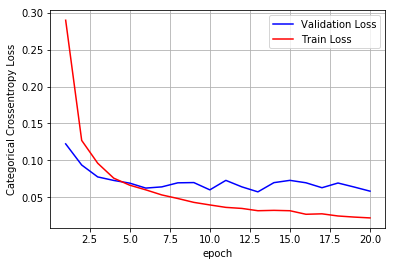

In [23]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

Here we took 2 hidden layers the best epoch is 6 after that the system is overfitting

# 3 Hidden Layers 467-311-207

In [34]:
model = Sequential()

model.add(Dense(467, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal()))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(311, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal()))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(207, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal()))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(output_dim, activation='softmax'))


model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 467)               366595    
_________________________________________________________________
batch_normalization_19 (Batc (None, 467)               1868      
_________________________________________________________________
dropout_19 (Dropout)         (None, 467)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 311)               145548    
_________________________________________________________________
batch_normalization_20 (Batc (None, 311)               1244      
_________________________________________________________________
dropout_20 (Dropout)         (None, 311)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 207)               64584     
__________

In [35]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 20s 336us/step - loss: 0.3891 - acc: 0.8796 - val_loss: 0.1444 - val_acc: 0.9551
Epoch 2/20
60000/60000 [==============================] - 17s 282us/step - loss: 0.1740 - acc: 0.9469 - val_loss: 0.0943 - val_acc: 0.9727
Epoch 3/20
60000/60000 [==============================] - 17s 277us/step - loss: 0.1356 - acc: 0.9585 - val_loss: 0.0850 - val_acc: 0.9732
Epoch 4/20
60000/60000 [==============================] - 17s 275us/step - loss: 0.1188 - acc: 0.9634 - val_loss: 0.0832 - val_acc: 0.9741
Epoch 5/20
60000/60000 [==============================] - 17s 275us/step - loss: 0.1033 - acc: 0.9677 - val_loss: 0.0779 - val_acc: 0.9774
Epoch 6/20
60000/60000 [==============================] - 17s 282us/step - loss: 0.0923 - acc: 0.9709 - val_loss: 0.0838 - val_acc: 0.9731
Epoch 7/20
60000/60000 [==============================] - 17s 286us/step - loss: 0.0870 - acc: 0.9727 - val_loss: 0.

Test score: 0.056106669586646604
Test accuracy: 0.9838


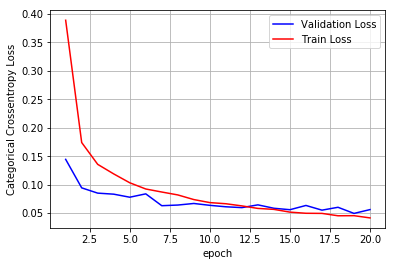

In [36]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

Here the best epoch rate is 13 after that there is some slight divergence in train and validation

# 4 Hidden Layers with 522-348-232-52

In [24]:
model = Sequential()

model.add(Dense(522, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal()))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(348, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal()))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(232, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal()))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(52, activation='relu', kernel_initializer=RandomNormal()) )
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(output_dim, activation='softmax'))


model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 522)               409770    
_________________________________________________________________
batch_normalization_7 (Batch (None, 522)               2088      
_________________________________________________________________
dropout_7 (Dropout)          (None, 522)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 348)               182004    
_________________________________________________________________
batch_normalization_8 (Batch (None, 348)               1392      
_________________________________________________________________
dropout_8 (Dropout)          (None, 348)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 232)               80968     
__________

In [25]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 17s 281us/step - loss: 0.3045 - acc: 0.9091 - val_loss: 0.1070 - val_acc: 0.9671
Epoch 2/20
60000/60000 [==============================] - 15s 250us/step - loss: 0.1347 - acc: 0.9597 - val_loss: 0.0876 - val_acc: 0.9736
Epoch 3/20
60000/60000 [==============================] - 15s 246us/step - loss: 0.1050 - acc: 0.9685 - val_loss: 0.0774 - val_acc: 0.9765
Epoch 4/20
60000/60000 [==============================] - 15s 253us/step - loss: 0.0859 - acc: 0.9737 - val_loss: 0.0761 - val_acc: 0.9779
Epoch 5/20
60000/60000 [==============================] - 16s 269us/step - loss: 0.0739 - acc: 0.9768 - val_loss: 0.0640 - val_acc: 0.9806
Epoch 6/20
60000/60000 [==============================] - 16s 267us/step - loss: 0.0664 - acc: 0.9792 - val_loss: 0.0648 - val_acc: 0.9815
Epoch 7/20
60000/60000 [==============================] - 14s 238us/step - loss: 0.0588 - acc: 0.9814 - val_loss: 0.

Test score: 0.061959343498636736
Test accuracy: 0.9846


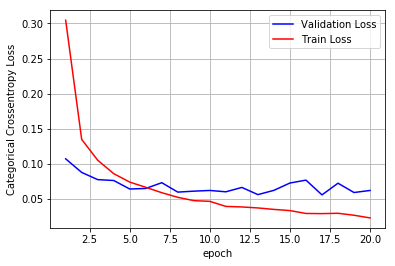

In [26]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

Here the best epoch rate is 8 then we can see that system starts to overfit

# 5 Hidden Layers 654-554-454-354-254

In [37]:
model = Sequential()

model.add(Dense(654, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal()))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(554, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal()))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(454, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal()))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(354, activation='relu', kernel_initializer=RandomNormal()) )
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(254, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal()))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(output_dim, activation='softmax'))


model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 654)               513390    
_________________________________________________________________
batch_normalization_22 (Batc (None, 654)               2616      
_________________________________________________________________
dropout_22 (Dropout)         (None, 654)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 554)               362870    
_________________________________________________________________
batch_normalization_23 (Batc (None, 554)               2216      
_________________________________________________________________
dropout_23 (Dropout)         (None, 554)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 454)               251970    
__________

In [38]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 42s 694us/step - loss: 0.7280 - acc: 0.7790 - val_loss: 0.1878 - val_acc: 0.9447
Epoch 2/20
60000/60000 [==============================] - 39s 645us/step - loss: 0.2664 - acc: 0.9216 - val_loss: 0.1284 - val_acc: 0.9625
Epoch 3/20
60000/60000 [==============================] - 37s 617us/step - loss: 0.2003 - acc: 0.9421 - val_loss: 0.1089 - val_acc: 0.9670
Epoch 4/20
60000/60000 [==============================] - 37s 616us/step - loss: 0.1735 - acc: 0.9496 - val_loss: 0.0982 - val_acc: 0.9710
Epoch 5/20
60000/60000 [==============================] - 37s 609us/step - loss: 0.1561 - acc: 0.9542 - val_loss: 0.0933 - val_acc: 0.9733
Epoch 6/20
60000/60000 [==============================] - 38s 631us/step - loss: 0.1378 - acc: 0.9593 - val_loss: 0.0771 - val_acc: 0.9773
Epoch 7/20
60000/60000 [==============================] - 39s 642us/step - loss: 0.1298 - acc: 0.9623 - val_loss: 0.

Test score: 0.05762099595500622
Test accuracy: 0.9835


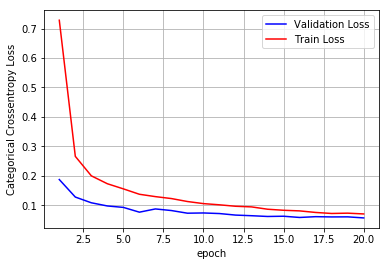

In [39]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# Observations

<table>
    <tr>
        <th>no of layers</th>
        <th>dropout rate</th>
        <th>test accuracy</th>
        <th>best epochs</th>
    </tr>
    <tr>
        <td>5</td>
        <td>0.5</td>
        <td>98.35</td>
        <td>19</td>
    </tr>
    <tr>
        <td>4</td>
        <td>0.2</td>
        <td>98.46</td>
        <td>8</td>
    </tr>
    <tr>
        <td>3</td>
        <td>0.4</td>
        <td>98.38</td>
        <td>13</td>
    </tr>
    <tr>
        <td>2</td>
        <td>0.6</td>
        <td>98.2</td>
        <td>5</td>
</table>    

# Conclusion


From the above table we can see almost all the models are performing good and with different droup rates we are getting similar accuracy. But we can see epochs are changes with no of layers.